In [1]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 

## Define Functions

In [2]:
# define SEIRD_model
def SEIRD_model(y, t, N0, alpha, beta, gamma, epsilon, mu):
    S, E, I, R, D, N = y
    dSdt = mu*N -beta * S * I / N0 - mu*S
    dEdt = beta * S * I / N0 - (mu + epsilon) * E
    dIdt = epsilon * E - (gamma + mu + alpha) * I
    dRdt = gamma * I - mu *R
    dDdt = -(dSdt + dEdt + dIdt + dRdt)
    dNdt = -dDdt
    return dSdt, dEdt, dIdt, dRdt, dDdt, dNdt

# plot SEIRD model
def plot_SEIRD(t, S, E, I, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,7))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Number of people')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

## Example Simulation and Plot

/tmp/ipykernel_73116/885671107.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


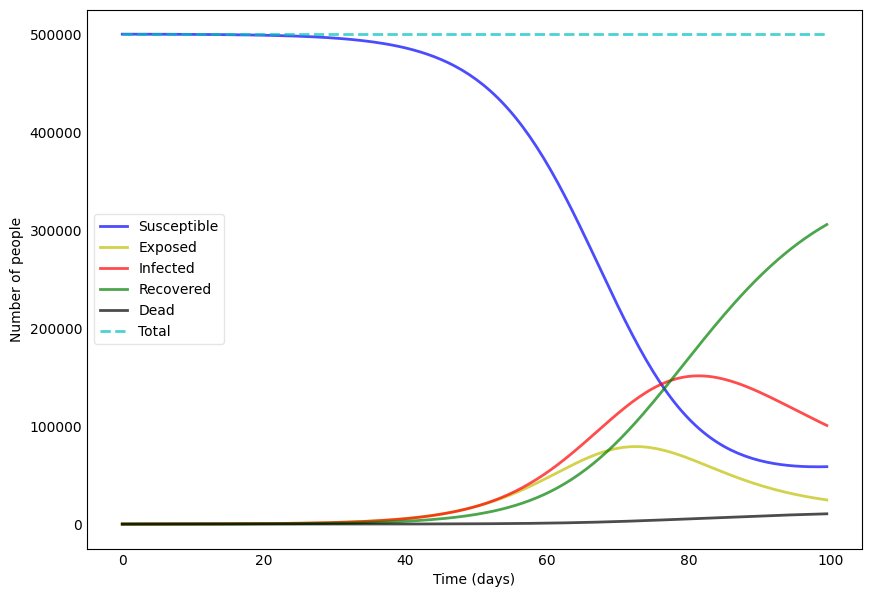

In [3]:
# Set initial and parameter values
alpha = 0.002 
beta = 0.35 
gamma = 1/14
epsilon = 1/5
mu = 1/100
R_0 = (beta*epsilon)/((epsilon+mu)*(gamma + alpha + mu))

N0 = 500e3
E0, I0, R0, D0 = 100, 1, 0, 0 
S0 = N0-E0-I0-R0-D0
y0 = S0, E0, I0, R0, D0, N0 # Initial conditions vector

# time vector
dt = .5
tstart = 0
tend = 100
t = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIRD_model, y0, t, args=(N0, alpha, beta, gamma, epsilon, mu))
S, E, I, R, D, N = sim.T

# plot results
plot_SEIRD(t, S, E, I, R, D)